In [105]:
# # Download the dataset and import it into Python
import xlrd
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

shark_df = pd.read_excel('data_clean.xlsx')
shark_df.rename(columns={'country_clean': 'country'}, inplace=True)
display(shark_df.head())




,date,year,type,state,location,activity,sex,injury,time,species,country,month,season,age_0,age_group,time_group
0,14Feb2024,2024,Unprovoked,Maharashtra,"Vaitarna River, Palghar District",Fishing,M,Calf of lower left leg injured,Unknown,"Bull shark, 7'",india,Feb,q1,32,Adult,Unknown
1,04Feb2024,2024,Provoked,NaN,NaN,Spearfishing,M,Shoulder bitten,06h30,Blacktip reef shark,trinidad and tobago,Feb,q1,30,Adult,Night
2,29Jan2024,2024,Unprovoked,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,F,Right leg bitten,20h00,Bull shark,australia,Jan,q1,29,Adult,Evening
3,15Jan2024,2024,Unprovoked,Paradise Island,Paradise Island Resort,Swimming,M,Right leg injured,16h00,NaN,bahamas,Jan,q1,10,Child,Afternoon
4,09Jan2024,2024,Unprovoked,South Australia,"Walkers Beach, Elliston",Surfing,M,Leg bitten,13h00,White shark,australia,Jan,q1,64,Senior,Afternoon


In [106]:
# count of each season

season_count=shark_df.groupby(['year','season'])['season'].agg(['count'])
season_count=season_count.reset_index()
season_count=season_count.pivot(index='season',columns='year',values='count')
season_count = season_count.drop(index='not sure')
season_count.columns= season_count.columns.astype(str)
season_count['total'] = season_count.sum(axis=1)
season_count['2024']=season_count['2024'].fillna(0)
season_count=season_count.astype(int)
display(season_count)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,total
season,,,,,,,,,,,,,,,,
q1,22,18,25,20,17,26,25,23,19,21,16,28,23,21,6,310
q2,17,29,31,29,28,38,38,38,36,27,22,31,24,26,0,414
q3,33,43,34,40,39,44,42,45,37,33,40,32,29,30,0,521
q4,23,27,22,27,30,34,21,22,26,29,21,15,20,27,0,344


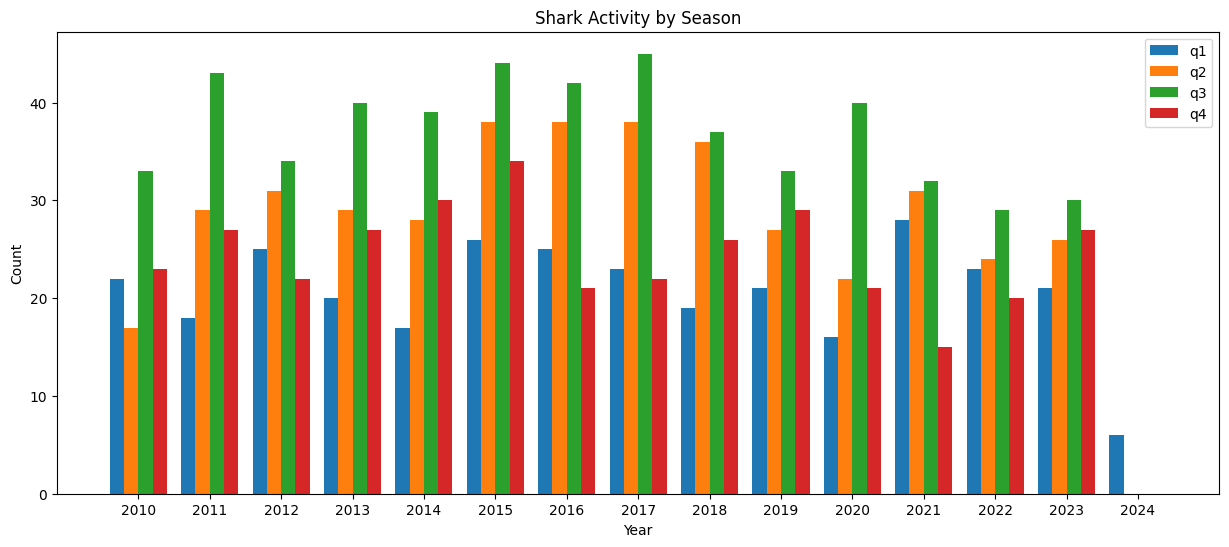

In [107]:

seasons = season_count.index.tolist()
years = season_count.columns.tolist()[:-1] 
data = [season_count.loc[season].tolist()[:-1] for season in seasons] 

bar_width = 0.2
bar_positions = np.arange(len(years))
year_gap = 0.2

fig, ax = plt.subplots(figsize=(15, 6))

for i, season_data in enumerate(data):
    ax.bar(bar_positions + i * bar_width, season_data, width=bar_width, label=seasons[i])

ax.set_xticks(bar_positions + (len(seasons) / 2) * bar_width * 0.75)
ax.set_xticklabels(years)

ax.set_title('Shark Activity by Season')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

ax.legend()
plt.savefig('shark_activity_by_season.png')
plt.show()

In [108]:
age_count=shark_df.groupby(['age_group'])['age_group'].count().reset_index(name='count')
group_mapped={
    'Adult':'Adult (18~60)',
    'Child':'Child (~12)',
    'Senior':'Senior (60~)',
    'Teen':'Teen (12~18)'
}
age_count['age_group']=age_count['age_group'].map(group_mapped)

custom_order = ['Child (~12)', 'Teen (12~18)', 'Adult (18~60)', 'Senior (60~)']
age_count_sorted = age_count.sort_values(by='age_group', key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))

age_count_sorted

,age_group,count
1,Child (~12),129
3,Teen (12~18),176
0,Adult (18~60),1219
2,Senior (60~),71


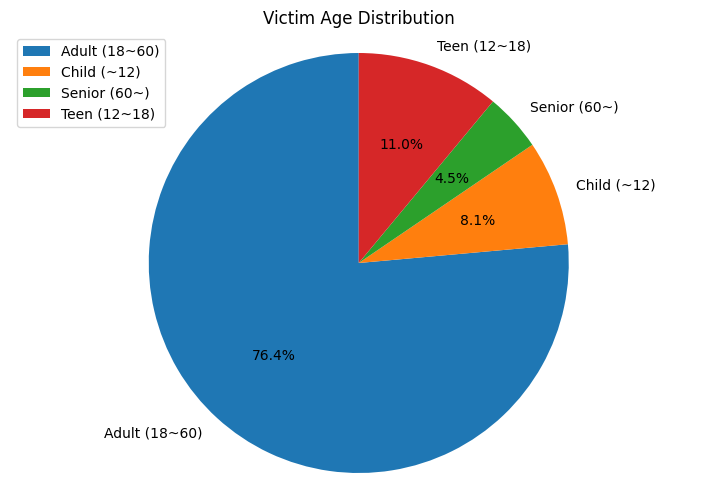

In [109]:
plt.figure(figsize=(9,6))
labels=age_count['age_group']
y=age_count['count']

plt.pie(y,labels=labels,autopct='%1.1f%%',startangle=90)

# Add legend
plt.legend(labels,loc='upper left')

# Hide labels on the pie chart
# plt.gca().set_visible(False)

plt.axis('equal')
plt.title('Victim Age Distribution')
plt.savefig('victim_age_distribution.png')
plt.show()

In [110]:
time_count=shark_df.groupby(['time_group'])['time_group'].count().reset_index(name='count')
time_count=time_count.drop(time_count[time_count['time_group'] == 'Unknown'].index)
time_mapped={
    'Afternoon':'Afternoon (12h-18h)',
    'Evening':'Evening (18h-0h)',
    'Morning':'Morning (6h-12h)',
    'Night':'Night (0h-6h)'
}
time_count['time_group']=time_count['time_group'].map(time_mapped)

custom_order = ['Morning (6h-12h)', 'Afternoon (12h-18h)', 'Evening (18h-0h)', 'Night [0h-6h)']
time_count_sorted = time_count.sort_values(by='time_group', key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))

time_count_sorted

,time_group,count
2,Morning (6h-12h),498
0,Afternoon (12h-18h),603
1,Evening (18h-0h),58
3,Night (0h-6h),32


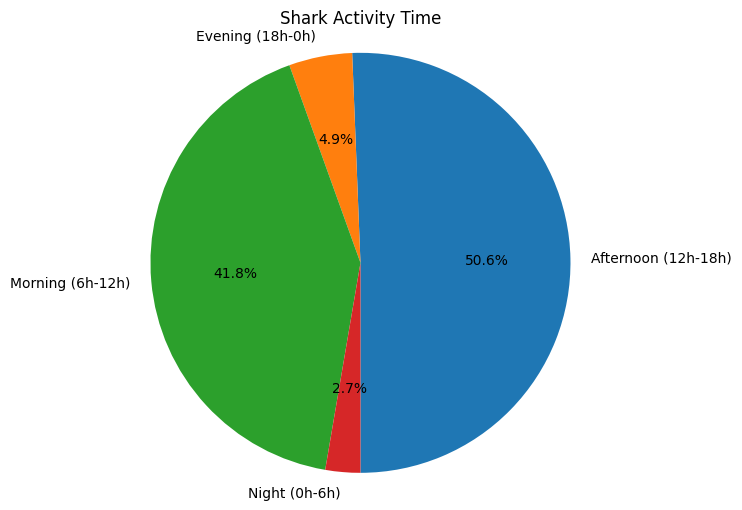

In [111]:
plt.figure(figsize=(8,6))
labels=time_count['time_group']
y=time_count['count']
# # Define custom colors
# colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

plt.pie(y,labels=labels,autopct='%1.1f%%',startangle=270) #,colors=colors

plt.axis('equal')
plt.title('Shark Activity Time')
plt.savefig('shark_activity_time.png')
plt.show()

In [112]:
country_distribution=shark_df.groupby(['country','season'])['season'].agg(['count'])
country_distribution=country_distribution.reset_index()
country_distribution=country_distribution.pivot(index='season',columns='country',values='count')
country_distribution = country_distribution.drop(index='not sure')
country_distribution = country_distribution.fillna(0).astype(int)

# column_totals = country_distribution.sum(axis=0)
# country_distribution.loc['total'] = column_totals

country_distribution

country,antigua and barbuda,argentina,australia,bahamas,belize,brazil,cabo verde,canada,cayman islands,chile,...,st. kitts and nevis,taiwan,thailand,tonga,trinidad and tobago,turks and caicos islands,united arab emirates,united kingdom,united states,vietnam
season,,,,,,,,,,,,,,,,,,,,,
q1,1,1,107,9,0,12,0,0,1,1,...,1,1,1,0,2,0,1,0,73,3
q2,0,0,89,10,3,7,1,0,1,0,...,0,0,4,0,0,1,2,1,183,0
q3,0,0,66,28,0,7,0,2,0,0,...,0,1,2,0,1,2,0,1,314,3
q4,0,0,85,9,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,186,0


In [113]:
# countries total >=10
country_totals = country_distribution.sum(axis=0)
filtered_countries = country_totals[country_totals >= 10].index
country_distribution_filtered = country_distribution[filtered_countries]


display(country_distribution_filtered)

country,australia,bahamas,brazil,egypt,fiji,french polynesia,mexico,new caledonia,new zealand,reunion,south africa,spain,united states
season,,,,,,,,,,,,,
q1,107,9,12,4,3,5,7,9,15,3,22,2,73
q2,89,10,7,5,6,11,10,11,9,8,27,1,183
q3,66,28,7,5,2,5,3,2,2,9,20,11,314
q4,85,9,2,5,1,3,8,1,4,6,10,2,186


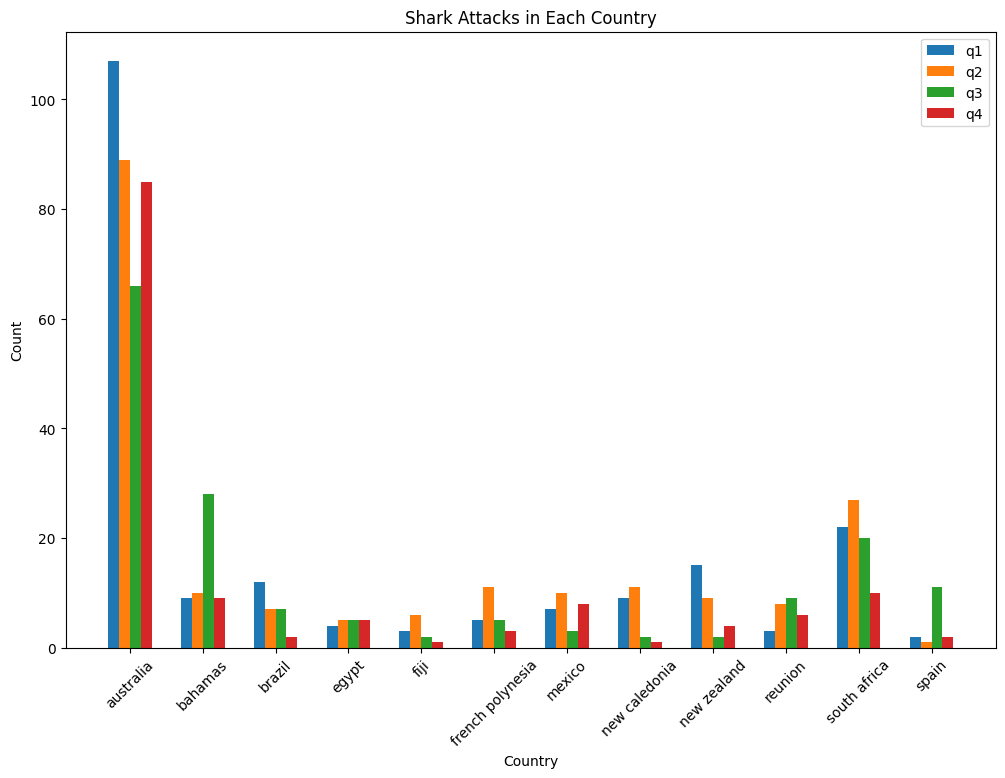

In [114]:
seasons1 = country_distribution_filtered.index.tolist()
countries = country_distribution_filtered.columns.tolist()[:-1] 
data = [country_distribution_filtered.loc[season].tolist()[:-1] for season in seasons1] 

bar_width = 0.15
bar_positions = np.arange(len(countries))
countries_gap = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

for i, country_data in enumerate(data):
    ax.bar(bar_positions + i * bar_width, country_data, width=bar_width, label=seasons1[i])

ax.set_xticks(bar_positions + (len(seasons1) / 2) * bar_width * 0.75)
ax.set_xticklabels(countries, rotation=45) 

ax.set_title('Shark Attacks in Each Country')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

ax.legend()
plt.savefig('shark_attacks_in_each_country.png')
plt.show()

In [115]:
column_totals2 = country_distribution_filtered.sum(axis=0)
country_distribution_filtered.loc['total'] = column_totals2
country_distribution_filtered=country_distribution_filtered.reset_index()
display(country_distribution_filtered)



C:\Users\54189\AppData\Local\Temp\ipykernel_18576\1089070262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_distribution_filtered.loc['total'] = column_totals2


country,season,australia,bahamas,brazil,egypt,fiji,french polynesia,mexico,new caledonia,new zealand,reunion,south africa,spain,united states
0,q1,107,9,12,4,3,5,7,9,15,3,22,2,73
1,q2,89,10,7,5,6,11,10,11,9,8,27,1,183
2,q3,66,28,7,5,2,5,3,2,2,9,20,11,314
3,q4,85,9,2,5,1,3,8,1,4,6,10,2,186
4,total,347,56,28,19,12,24,28,23,30,26,79,16,756


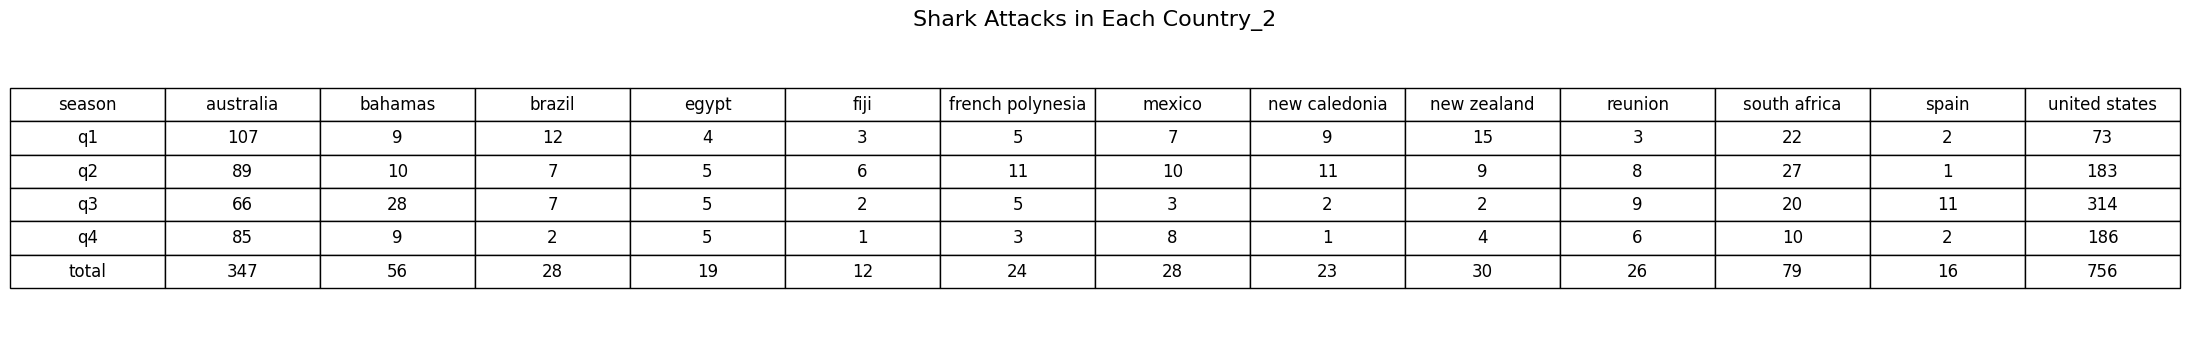

In [116]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight') 

ax.axis('off')

table = ax.table(cellText=country_distribution_filtered.values, colLabels=country_distribution_filtered.columns, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3.5, 2)

plt.title('Shark Attacks in Each Country_2', fontsize=16)
plt.savefig('shark_attacks_in_each_country_2.png', bbox_inches='tight')
plt.show()